# Kaggle Allstate Claims Severity
## Introduction : This is a competition hosted by Kaggle and All State to predict the costs and by extension determine the severity of claims. The job is to accurately predict claims severity depending on some of the variables.

#### There are 2 datasets i.e. train and test dataset. We build and train the model on the train dataset and run it on the test set to predict the outcome. We use simple linear regression and random forest to understand the dataset. There is no feature creation or feature engineering and the models are used in their base form to understand the power of machine learning algorithms

https://www.kaggle.com/c/allstate-claims-severity

### Importing the required libraries and the test and train files.

In [32]:
import pandas as pd
import numpy as np
import sklearn

In [33]:
df = pd.read_csv('/Users/anuragkaushik/Downloads/train-2.csv')
df2 = pd.read_csv('/Users/anuragkaushik/Downloads/test-2.csv')

### Number of rows and columns in test and train

In [34]:
print ('Number of rows in train : ',len(df)) 
print ('Number of rows in test : ',len(df2)) 

Number of rows in train :  188318
Number of rows in test :  125546


In [35]:
print('Number of Columns in train :', len(df.columns))
print('Number of Columns in test :', len(df2.columns))

Number of Columns in train : 132
Number of Columns in test : 131


### Checking the dtypes of the columns for train and test

In [36]:
#for i in df.columns.values:
   # if df[i].dtype != 'int64' and df[i].dtype != 'float64':
       # print(i, df[i].dtype)
print(df.dtypes)

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    

In [37]:
#for i in df2.columns.values:
    #if df2[i].dtype != 'int64' and df2[i].dtype != 'float64':
        #print(i, df2[i].dtype)
print(df2.dtypes)

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat101     object
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     

### Converting the categorical variables into integer types for ease of use

In [38]:
# Using LabelEncoder to convert categorical data to numeric.
from sklearn.preprocessing import LabelEncoder


In [39]:
df_le = df.iloc[:,1:-15]
df_noe = df.iloc[:,-15:]

In [40]:
df2_le = df2.iloc[:,1:-15]
df2_noe = df2.iloc[:,-15:]


In [41]:
df_le = df_le.apply(LabelEncoder().fit_transform)
df2_le = df2_le.apply(LabelEncoder().fit_transform)

In [42]:
train = pd.concat([df_le, df_noe], axis=1)
test = pd.concat([df2_le, df2_noe], axis=1)

In [43]:
train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0,1,0,1,0,0,0,0,1,0,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,0,1,0,0,0,0,0,0,1,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,0,1,0,0,1,0,0,0,1,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,1,1,0,1,0,0,0,0,1,0,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,0,1,0,1,0,0,0,0,1,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [44]:
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,0,0,0,0,0,1,0,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,0,1,0,1,0,0,0,0,1,0,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,0,1,0,1,1,0,1,0,1,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,0,0,0,0,1,0,0,0,0,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,1,0,0,0,0,1,0,0,0,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


### Checking the difference between the two datasets to check for any additional columns

In [45]:
train.columns.difference(test.columns)

Index(['loss'], dtype='object')

### Checking for missing values in train and test

In [46]:
#checking for missing values in train
print(df.isnull().sum()>0)

id        False
cat1      False
cat2      False
cat3      False
cat4      False
cat5      False
cat6      False
cat7      False
cat8      False
cat9      False
cat10     False
cat11     False
cat12     False
cat13     False
cat14     False
cat15     False
cat16     False
cat17     False
cat18     False
cat19     False
cat20     False
cat21     False
cat22     False
cat23     False
cat24     False
cat25     False
cat26     False
cat27     False
cat28     False
cat29     False
          ...  
cat102    False
cat103    False
cat104    False
cat105    False
cat106    False
cat107    False
cat108    False
cat109    False
cat110    False
cat111    False
cat112    False
cat113    False
cat114    False
cat115    False
cat116    False
cont1     False
cont2     False
cont3     False
cont4     False
cont5     False
cont6     False
cont7     False
cont8     False
cont9     False
cont10    False
cont11    False
cont12    False
cont13    False
cont14    False
loss      False
dtype: bool


In [47]:
#checking for missing values in test
#print(df2.isnull().sum()>0)

In [48]:
train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0,1,0,1,0,0,0,0,1,0,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,0,1,0,0,0,0,0,0,1,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,0,1,0,0,1,0,0,0,1,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,1,1,0,1,0,0,0,0,1,0,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,0,1,0,1,0,0,0,0,1,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


### Splitting into features and lables to feed into the machine learning algorithms

In [49]:
labels = train['loss']
features = train.iloc[:,0:-1]

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Using Linear Regression and Random Forest Regression

In [51]:
reg = LinearRegression()
reg = reg.fit(features,labels)

reg2 = RandomForestRegressor()
reg2 = reg2.fit(features,labels)

In [52]:
train['predict_LR'] = reg.predict(features)
train['predict_RF'] = reg2.predict(features)

In [53]:
from sklearn.metrics import r2_score
score = r2_score(labels, train.predict_LR)
score2 = r2_score(labels, train.predict_RF)

### Checking the accuracy using the R squared value

In [54]:
print ('R squared for Linear Regression is :', score)
print ('R squared for Random Forest is :', score2)

R squared for Linear Regression is : 0.482775124956
R squared for Random Forest is : 0.907581897776


### Performing the same operations on the test dataset

In [55]:
test.columns.values

array(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22',
       'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29',
       'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36',
       'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43',
       'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50',
       'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
       'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64',
       'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71',
       'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78',
       'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85',
       'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92',
       'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99',
       'cat100', 'ca

In [56]:
le = LabelEncoder()
test.cat116 = le.fit_transform(test.cat116.astype('str'))

### Since Random Forest Regression is far better than Linear, we use the former instead of the latter.

In [57]:
test['predict_RF'] = reg2.predict(test)

In [58]:
submit = pd.DataFrame({ 'id' : df2['id'], 'loss': test['predict_RF'] })

In [59]:
submit.to_csv('/Users/anuragkaushik/Downloads/submit_RF.csv', index = False)

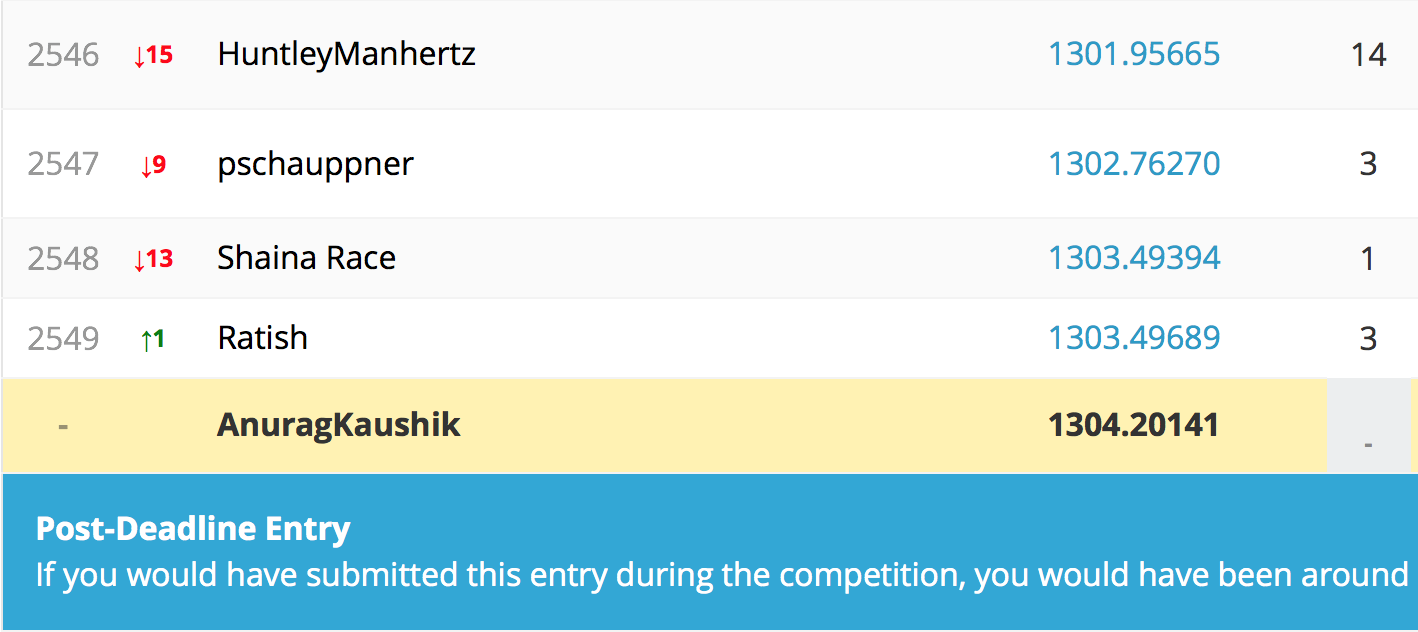

In [60]:
from IPython.display import Image
Image(filename='/Users/anuragkaushik/Desktop/allstate.png')

### Accuracy can be improved significantly using better features and digging deep into the machine learning algorithms.

### Thus machine learning algorithms can be used to understand relationships in data